In [1]:
#https://www.worldometers.info/coronavirus/#countries

In [2]:
# !pip install beautifulsoup4

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
from bs4 import BeautifulSoup as soup
from urllib.request import Request,urlopen
import warnings
warnings.filterwarnings('ignore')

In [4]:
# !pip install plotly

In [5]:
url="https://www.worldometers.info/coronavirus/#countries"
req=Request(url,headers={'User-Agent':'Mozilla/5.0'})
webpage=urlopen(req)
print(webpage)

In [6]:
print(url)
print(req)

https://www.worldometers.info/coronavirus/#countries



<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="6
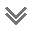

In [7]:
page_soup=soup(webpage,'html.parser')
page_soup

In [8]:
from datetime import date,datetime

In [9]:
today=datetime.now()
today

datetime.datetime(2022, 6, 9, 7, 18, 59, 92849)

In [10]:
yesterday_str='%s,%d,%d' %(date.today().strftime('%b'),today.day-1,today.year)
print(yesterday_str)
print(today)

Jun,8,2022
2022-06-09 07:18:59.092849


In [11]:
table=page_soup.findAll('table',{'id':'main_table_countries_yesterday'})
table

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_yesterday" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
 <tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New 

In [12]:
containers=table[0].findAll('tr',{'style':''})
containers

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>536,613,116</td>
 <td

In [13]:
table = page_soup.findAll('table', {'id' :"main_table_countries_yesterday"})
containers = table[0].findAll('tr',{'style':""})
title = containers[0]

del containers[0]
all_data = []
clean = True

for country in containers :
    country_data = []
    country_container = country.findAll('td')
    
    if country_container[1].text == 'China' :
        continue
    for i in range(1, len(country_container)) :
        final_feature = country_container[i].text
        if clean :
            if i !=1 and i !=len(country_container)-1 :
                final_feature = final_feature.replace(",","")
                
                if final_feature.find('+') !=-1 :
                    final_feature = final_feature.replace("+","")
                    final_feature = float(final_feature)
                elif final_feature.find('-') !=-1:
                    final_feature = final_feature.replace('-','')
                    final_feature = float(final_feature)*-1
            if final_feature =='N/A':
                final_feature = 0
            elif final_feature == "" or final_feature ==" ":
                final_feature = -1
            
            country_data.append(final_feature)
        
    all_data.append(country_data)

In [14]:
all_data

[['World',
  '536613116',
  568755.0,
  '6323903',
  1558.0,
  '507571744',
  693871.0,
  '22717469',
  '36557',
  '68842',
  '811.3',
  -1,
  -1,
  -1,
  'All',
  '\n',
  -1,
  -1,
  -1,
  -1,
  -1],
 ['USA',
  '86891823',
  102736.0,
  '1034748 ',
  368.0,
  '82754297',
  82776.0,
  '3102778',
  '2692',
  '259572',
  '3091',
  '1035982340',
  '3094795',
  '334749957 ',
  'North America',
  '4',
  '324',
  '0',
  '307',
  '1',
  '9,269'],
 ['India',
  '43190282',
  5233.0,
  '524715 ',
  7.0,
  '42636710',
  3345.0,
  '28857',
  '698',
  '30714',
  '373',
  '853209262',
  '606749',
  '1406199041 ',
  'Asia',
  '33',
  '2680',
  '2',
  '4',
  -1,
  '21'],
 ['Brazil',
  '31266163',
  71045.0,
  '667400 ',
  294.0,
  '30145810',
  44442.0,
  '452953',
  '8318',
  '145102',
  '3097',
  '63776166',
  '295977',
  '215476553 ',
  'South America',
  '7',
  '323',
  '3',
  '330',
  '1',
  '2,102'],
 ['France',
  '29659417',
  11627.0,
  '148591 ',
  74.0,
  '29114787',
  29942.0,
  '396039',
 

In [15]:
df = pd.DataFrame(all_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,World,536613116,568755.0,6323903,1558.0,507571744,693871.0,22717469,36557,68842,...,-1,-1,-1,All,\n,-1,-1,-1,-1,-1
1,USA,86891823,102736.0,1034748,368.0,82754297,82776.0,3102778,2692,259572,...,1035982340,3094795,334749957,North America,4,324,0,307,1,"9,269"
2,India,43190282,5233.0,524715,7.0,42636710,3345.0,28857,698,30714,...,853209262,606749,1406199041,Asia,33,2680,2,4,-1,21
3,Brazil,31266163,71045.0,667400,294.0,30145810,44442.0,452953,8318,145102,...,63776166,295977,215476553,South America,7,323,3,330,1,"2,102"
4,France,29659417,11627.0,148591,74.0,29114787,29942.0,396039,1173,452454,...,271490188,4141579,65552340,Europe,2,441,0,177,1,"6,042"


In [16]:
df.drop([15,16,17,18,19,20], inplace = True, axis=1)

In [17]:
column_labels = ["country,other","Total Cases", "New Cases","Total Deaths","New Deaths", 
                 "Total Recovered", "New Recovered", "Active Cases","Serious,Critical", 
                 "Tot Cases/1M pop", "Deaths/1M POP", "Total Tests","Tests/1M Pop", "Population", "Continent"]

In [18]:
df.columns = column_labels
df.head()

,"country,other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M POP,Total Tests,Tests/1M Pop,Population,Continent
0,World,536613116,568755.0,6323903,1558.0,507571744,693871.0,22717469,36557,68842,811.3,-1,-1,-1,All
1,USA,86891823,102736.0,1034748,368.0,82754297,82776.0,3102778,2692,259572,3091,1035982340,3094795,334749957,North America
2,India,43190282,5233.0,524715,7.0,42636710,3345.0,28857,698,30714,373,853209262,606749,1406199041,Asia
3,Brazil,31266163,71045.0,667400,294.0,30145810,44442.0,452953,8318,145102,3097,63776166,295977,215476553,South America
4,France,29659417,11627.0,148591,74.0,29114787,29942.0,396039,1173,452454,2267,271490188,4141579,65552340,Europe


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country,other     223 non-null    object 
 1   Total Cases       223 non-null    object 
 2   New Cases         223 non-null    float64
 3   Total Deaths      223 non-null    object 
 4   New Deaths        223 non-null    float64
 5   Total Recovered   223 non-null    object 
 6   New Recovered     223 non-null    float64
 7   Active Cases      223 non-null    object 
 8   Serious,Critical  223 non-null    object 
 9   Tot Cases/1M pop  223 non-null    object 
 10  Deaths/1M POP     223 non-null    object 
 11  Total Tests       223 non-null    object 
 12  Tests/1M Pop      223 non-null    object 
 13  Population        223 non-null    object 
 14  Continent         223 non-null    object 
dtypes: float64(3), object(12)
memory usage: 26.3+ KB


In [20]:
for label in df.columns:
    if label != "country,other" and label !="Continent":
        df[label] = pd.to_numeric(df[label])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country,other     223 non-null    object 
 1   Total Cases       223 non-null    int64  
 2   New Cases         223 non-null    float64
 3   Total Deaths      223 non-null    int64  
 4   New Deaths        223 non-null    float64
 5   Total Recovered   223 non-null    int64  
 6   New Recovered     223 non-null    float64
 7   Active Cases      223 non-null    int64  
 8   Serious,Critical  223 non-null    int64  
 9   Tot Cases/1M pop  223 non-null    float64
 10  Deaths/1M POP     223 non-null    float64
 11  Total Tests       223 non-null    int64  
 12  Tests/1M Pop      223 non-null    int64  
 13  Population        223 non-null    int64  
 14  Continent         223 non-null    object 
dtypes: float64(5), int64(8), object(2)
memory usage: 26.3+ KB


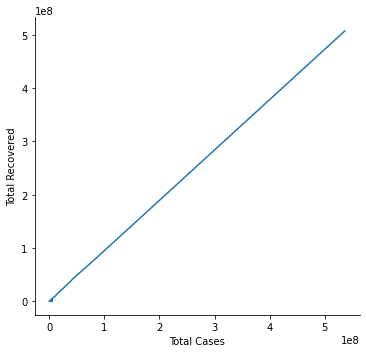

In [22]:
sns.relplot(x='Total Cases', y = 'Total Recovered', kind='line', data=df)
plt.show()

## EDA

In [23]:
df.columns

Index(['country,other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M POP', 'Total Tests',
       'Tests/1M Pop', 'Population', 'Continent'],
      dtype='object')

In [24]:
df['%inc Cases'] = df['New Cases']/df['Total Cases']*100
df['%inc Deaths'] = df['New Deaths']/df['Total Deaths']*100
df['%inc Recovered'] = df['New Recovered']/df['Total Recovered']*100

In [25]:
df.head()

,"country,other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M POP,Total Tests,Tests/1M Pop,Population,Continent,%inc Cases,%inc Deaths,%inc Recovered
0,World,536613116,568755.0,6323903,1558.0,507571744,693871.0,22717469,36557,68842.0,811.3,-1,-1,-1,All,0.105990,0.024637,0.136704
1,USA,86891823,102736.0,1034748,368.0,82754297,82776.0,3102778,2692,259572.0,3091.0,1035982340,3094795,334749957,North America,0.118234,0.035564,0.100026
2,India,43190282,5233.0,524715,7.0,42636710,3345.0,28857,698,30714.0,373.0,853209262,606749,1406199041,Asia,0.012116,0.001334,0.007845
3,Brazil,31266163,71045.0,667400,294.0,30145810,44442.0,452953,8318,145102.0,3097.0,63776166,295977,215476553,South America,0.227226,0.044052,0.147423
4,France,29659417,11627.0,148591,74.0,29114787,29942.0,396039,1173,452454.0,2267.0,271490188,4141579,65552340,Europe,0.039202,0.049801,0.102841


In [44]:
cases = df[['Total Recovered','Active Cases','Total Deaths']].loc[0]
cases

Total Recovered    507571744
Active Cases        22717469
Total Deaths         6323903
Name: 0, dtype: int64

In [45]:
cases_df = pd.DataFrame(cases).reset_index()
cases_df

,index,0
0,Total Recovered,507571744
1,Active Cases,22717469
2,Total Deaths,6323903


In [46]:
cases_df.columns = ['Type', 'Total']
cases_df

,Type,Total
0,Total Recovered,507571744
1,Active Cases,22717469
2,Total Deaths,6323903


In [48]:
df.columns

Index(['country,other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M POP', 'Total Tests',
       'Tests/1M Pop', 'Population', 'Continent', '%inc Cases', '%inc Deaths',
       '%inc Recovered'],
      dtype='object')

In [49]:
cases_df['Percentage'] = np.round(100*cases_df['Total']/np.sum(cases_df['Total']),2)
cases_df

,Type,Total,Percentage
0,Total Recovered,507571744,94.59
1,Active Cases,22717469,4.23
2,Total Deaths,6323903,1.18


In [50]:
cases_df['Virus'] = ['COVID-19' for i in range(len(cases_df))]
cases_df

,Type,Total,Percentage,Virus
0,Total Recovered,507571744,94.59,COVID-19
1,Active Cases,22717469,4.23,COVID-19
2,Total Deaths,6323903,1.18,COVID-19


In [51]:
cases_df.to_csv("total_covid_details.csv")

# Visualization

In [52]:
cases = df[['Total Recovered','Active Cases','Total Deaths']].loc[0]
cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns = ['Type', 'Total']
cases_df['Percentage'] = np.round(100*cases_df['Total']/np.sum(cases_df['Total']),2)
cases_df['Virus'] = ['COVID-19' for i in range(len(cases_df))]
fig = px.bar(cases_df, x='Virus', y = 'Percentage', color = 'Type', hover_data = ['Total'])
fig.show()

In [53]:
df.columns

Index(['country,other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M POP', 'Total Tests',
       'Tests/1M Pop', 'Population', 'Continent', '%inc Cases', '%inc Deaths',
       '%inc Recovered'],
      dtype='object')

In [54]:
cases = df[['New Cases','New Recovered','New Deaths']].loc[0]
cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns = ['Type', 'Total']
cases_df['Percentage'] = np.round(100*cases_df['Total']/np.sum(cases_df['Total']),2)
cases_df['Virus'] = ['COVID-19' for i in range(len(cases_df))]
fig = px.bar(cases_df, x='Virus', y = 'Percentage', color = 'Type', hover_data = ['Total'])
fig.show()

In [56]:
percent = np.round(df[['%inc Cases', '%inc Deaths','%inc Recovered']].loc[0],2)
per_df = pd.DataFrame(percent)
per_df.columns = ['Percentage']
fig = go.Figure()

fig.add_trace(go.Bar(x = per_df.index, y = per_df['Percentage'], marker_color = ['yellow','red','blue']))
fig.show()

In [57]:
per_df

,Percentage
%inc Cases,0.11
%inc Deaths,0.02
%inc Recovered,0.14


In [58]:
df.head(6)

,"country,other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M POP,Total Tests,Tests/1M Pop,Population,Continent,%inc Cases,%inc Deaths,%inc Recovered
0,World,536613116,568755.0,6323903,1558.0,507571744,693871.0,22717469,36557,68842.0,811.3,-1,-1,-1,All,0.105990,0.024637,0.136704
1,USA,86891823,102736.0,1034748,368.0,82754297,82776.0,3102778,2692,259572.0,3091.0,1035982340,3094795,334749957,North America,0.118234,0.035564,0.100026
2,India,43190282,5233.0,524715,7.0,42636710,3345.0,28857,698,30714.0,373.0,853209262,606749,1406199041,Asia,0.012116,0.001334,0.007845
3,Brazil,31266163,71045.0,667400,294.0,30145810,44442.0,452953,8318,145102.0,3097.0,63776166,295977,215476553,South America,0.227226,0.044052,0.147423
4,France,29659417,11627.0,148591,74.0,29114787,29942.0,396039,1173,452454.0,2267.0,271490188,4141579,65552340,Europe,0.039202,0.049801,0.102841
5,Germany,26610333,67073.0,139793,45.0,25696800,72700.0,773740,631,315658.0,1658.0,122332384,1451136,84301132,Europe,0.252056,0.032190,0.282915


In [59]:
Continent_df = df.groupby('Continent').sum().drop('All')
Continent_df = Continent_df.reset_index()
Continent_df

,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M POP,Total Tests,Tests/1M Pop,Population,%inc Cases,%inc Deaths,%inc Recovered
0,Africa,12180854,6949.0,255174,11.0,10315205,6150.0,453845,934,1923050.0,18026.0,103881614,10612506,1401926727,1.569827,-16.009277,0.862927
1,Asia,157107660,186433.0,1425192,190.0,150142466,305281.0,4124113,10657,5615196.0,31424.0,1987186493,82679454,3234309008,5.112511,97.328603,17.428875
2,Australia/Oceania,8999130,37649.0,12698,39.0,8621089,49004.0,292973,109,1992122.0,6588.0,145456400,29762202,43550631,-44.092300,241.965340,88.410355
3,Europe,197191597,147184.0,1844614,470.0,175833399,192675.0,3623121,6134,15562939.0,114167.0,2691063213,201319645,748500583,2.029452,-10.775505,2.581391
4,North America,102617617,112810.0,1477800,380.0,96550844,92277.0,4577646,8044,7373951.0,53405.0,1159662837,92987255,598022521,3.145656,-166.177932,3.634509
5,South America,58137439,77579.0,1299997,304.0,51560499,48232.0,1051690,10550,2215217.0,31630.0,223201665,12864046,437622357,0.787051,99.829902,0.467566


In [60]:
def continent_visualization(v_list):
    for label in v_list:
        c_df = Continent_df[['Continent', label]]
        c_df['Percentage'] = np.round(100*c_df[label]/np.sum(c_df[label]),2)
        c_df['Virus'] = ['COVID-19' for i in range(len(c_df))]
        
        fig = px.bar(c_df, x='Virus', y = 'Percentage', color='Continent', hover_data=[label])
        fig.update_layout(title={'text': f"{label}"})
        fig.show()

In [61]:
df.head()

,"country,other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M POP,Total Tests,Tests/1M Pop,Population,Continent,%inc Cases,%inc Deaths,%inc Recovered
0,World,536613116,568755.0,6323903,1558.0,507571744,693871.0,22717469,36557,68842.0,811.3,-1,-1,-1,All,0.105990,0.024637,0.136704
1,USA,86891823,102736.0,1034748,368.0,82754297,82776.0,3102778,2692,259572.0,3091.0,1035982340,3094795,334749957,North America,0.118234,0.035564,0.100026
2,India,43190282,5233.0,524715,7.0,42636710,3345.0,28857,698,30714.0,373.0,853209262,606749,1406199041,Asia,0.012116,0.001334,0.007845
3,Brazil,31266163,71045.0,667400,294.0,30145810,44442.0,452953,8318,145102.0,3097.0,63776166,295977,215476553,South America,0.227226,0.044052,0.147423
4,France,29659417,11627.0,148591,74.0,29114787,29942.0,396039,1173,452454.0,2267.0,271490188,4141579,65552340,Europe,0.039202,0.049801,0.102841


In [62]:
cases_list = ['Total Cases','New Cases','Active Cases','Tot Cases/1M pop']
deaths_list = ['Total Deaths','New Deaths','Deaths/1M POP']
recovered_list = ['Total Recovered','New Recovered','%inc Recovered']

In [63]:
continent_visualization(cases_list)

In [64]:
continent_visualization(deaths_list)

In [65]:
continent_visualization(recovered_list)

# Countries Wise Analysis

In [66]:
df.head()

,"country,other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M POP,Total Tests,Tests/1M Pop,Population,Continent,%inc Cases,%inc Deaths,%inc Recovered
0,World,536613116,568755.0,6323903,1558.0,507571744,693871.0,22717469,36557,68842.0,811.3,-1,-1,-1,All,0.105990,0.024637,0.136704
1,USA,86891823,102736.0,1034748,368.0,82754297,82776.0,3102778,2692,259572.0,3091.0,1035982340,3094795,334749957,North America,0.118234,0.035564,0.100026
2,India,43190282,5233.0,524715,7.0,42636710,3345.0,28857,698,30714.0,373.0,853209262,606749,1406199041,Asia,0.012116,0.001334,0.007845
3,Brazil,31266163,71045.0,667400,294.0,30145810,44442.0,452953,8318,145102.0,3097.0,63776166,295977,215476553,South America,0.227226,0.044052,0.147423
4,France,29659417,11627.0,148591,74.0,29114787,29942.0,396039,1173,452454.0,2267.0,271490188,4141579,65552340,Europe,0.039202,0.049801,0.102841


In [67]:
df.tail()

,"country,other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M POP,Total Tests,Tests/1M Pop,Population,Continent,%inc Cases,%inc Deaths,%inc Recovered
217,Macao,83,-1.0,-1,-1.0,82,-1.0,1,-1,125.0,-1.0,5584,8379,666424,Asia,-1.204819,100.0,-1.219512
218,Micronesia,34,-1.0,-1,-1.0,30,-1.0,4,-1,290.0,-1.0,21109,179879,117351,Australia/Oceania,-2.941176,100.0,-3.333333
219,Marshall Islands,18,-1.0,-1,-1.0,17,-1.0,1,-1,300.0,-1.0,-1,-1,59961,Australia/Oceania,-5.555556,100.0,-5.882353
220,Nauru,13,-1.0,-1,-1.0,8,-1.0,5,-1,1187.0,-1.0,-1,-1,10955,Australia/Oceania,-7.692308,100.0,-12.500000
221,Tuvalu,3,-1.0,-1,-1.0,-1,-1.0,3,-1,248.0,-1.0,-1,-1,12073,Australia/Oceania,-33.333333,100.0,100.000000


In [68]:
df = df.drop([len(df)-1])
country_df = df.drop([0])
country_df.head()

,"country,other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M POP,Total Tests,Tests/1M Pop,Population,Continent,%inc Cases,%inc Deaths,%inc Recovered
1,USA,86891823,102736.0,1034748,368.0,82754297,82776.0,3102778,2692,259572.0,3091.0,1035982340,3094795,334749957,North America,0.118234,0.035564,0.100026
2,India,43190282,5233.0,524715,7.0,42636710,3345.0,28857,698,30714.0,373.0,853209262,606749,1406199041,Asia,0.012116,0.001334,0.007845
3,Brazil,31266163,71045.0,667400,294.0,30145810,44442.0,452953,8318,145102.0,3097.0,63776166,295977,215476553,South America,0.227226,0.044052,0.147423
4,France,29659417,11627.0,148591,74.0,29114787,29942.0,396039,1173,452454.0,2267.0,271490188,4141579,65552340,Europe,0.039202,0.049801,0.102841
5,Germany,26610333,67073.0,139793,45.0,25696800,72700.0,773740,631,315658.0,1658.0,122332384,1451136,84301132,Europe,0.252056,0.032190,0.282915


In [69]:
country_df.tail()

,"country,other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M POP,Total Tests,Tests/1M Pop,Population,Continent,%inc Cases,%inc Deaths,%inc Recovered
216,Wallis and Futuna,454,-1.0,7,-1.0,438,-1.0,9,-1,41809.0,645.0,20508,1888572,10859,Australia/Oceania,-0.220264,-14.285714,-0.228311
217,Macao,83,-1.0,-1,-1.0,82,-1.0,1,-1,125.0,-1.0,5584,8379,666424,Asia,-1.204819,100.000000,-1.219512
218,Micronesia,34,-1.0,-1,-1.0,30,-1.0,4,-1,290.0,-1.0,21109,179879,117351,Australia/Oceania,-2.941176,100.000000,-3.333333
219,Marshall Islands,18,-1.0,-1,-1.0,17,-1.0,1,-1,300.0,-1.0,-1,-1,59961,Australia/Oceania,-5.555556,100.000000,-5.882353
220,Nauru,13,-1.0,-1,-1.0,8,-1.0,5,-1,1187.0,-1.0,-1,-1,10955,Australia/Oceania,-7.692308,100.000000,-12.500000


In [70]:
country_df.shape

(220, 18)

In [71]:
LOOK_AT = 10
country = country_df.columns[1:14]

fig = go.Figure()

c = 0

for i in country_df.index:
    if c < LOOK_AT:
        fig.add_trace(go.Bar(name = country_df['country,other'][i], x = country, y = country_df.loc[i][1:14]))
    else:
        break
    c +=1
fig.update_layout(title = {'text': f'top{LOOK_AT} countris affected'}, yaxis_type = 'log')
fig.show()